In [1]:
import pandas as pd
import nltk
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels
%matplotlib inline

In [2]:
treatments = pd.read_csv("intervention_browse.txt", sep='|')
treatments.head()

,MESH_INTERVENTION_ID,NCT_ID,MESH_TERM
0,42,NCT00000173,Vitamins
1,43,NCT00000174,Rivastigmine
2,44,NCT00000176,Estrogens
3,45,NCT00000177,Estrogens
4,46,NCT00000178,Prednisone


In [5]:
treatments['MESH_TERM'].value_counts()[0:50]

Paclitaxel                          1884
Cyclophosphamide                    1666
Gemcitabine                         1593
Antibodies, Monoclonal              1569
Bevacizumab                         1551
Cisplatin                           1531
Insulin                             1470
Vitamins                            1466
Carboplatin                         1439
Dexamethasone                       1402
Sirolimus                           1367
Everolimus                          1334
Docetaxel                           1304
Dexamethasone acetate               1290
BB 1101                             1290
Dexamethasone 21-phosphate          1290
Anesthetics                         1289
Doxorubicin                         1261
Rituximab                           1220
Metformin                           1184
Liposomal doxorubicin               1168
Fluorouracil                        1119
Pharmaceutical Solutions            1115
Insulin, Globin Zinc                1073
Vitamin D       

In [8]:
#would like to group by type of drug:
categories = {'DNA/RNA disruption': ['Cisplatin', 'Fluorouracil', 'Doxorubicin',
                                     'liposomal doxorubicin',
                                     'Methotrexate', 'Oxaliplatin', 
                                     'Fludarabine', 'Fludarabine phosphate',
                                    'Irinotecan', 'Capecitabine', 'Cyclophoshamide'],
              'antibodies': ['Antibodies', 'Antibodies, Monoclonal', 'Bevacizumab', 'Rituximab'],
              'immunosuppressants': [['Prednisone', 'Prednisolone', 'Prednisolone acetate',
                                       'Prednisolone hemisuccinate', 'Prednisolone phosphate',
                                      'Methylprednisolone acetate', 'Methylprednisolone',
                                       'Methylprednisolone Hemisuccinate', 
                                      'Methylprednisolone aceponate', 'Prednisone',
                                      'Dexamethasone', 'Dexamethasone 21-phosphate',
                                       'Dexamethasone acetate',
                                       'Dexamethasone, neomycin, polymyxin B drug combination' 
                                      'Everolimus', 'Sirolimus', 
                                      'Mycophenolate mofetil'],
              'immune stimulators': ['Interferon-alpha', 'Interferons', 'Interferon beta-1b',
                                   'Interferon-beta', 'Interferon-gamma', 'Interferon beta 1a',
                                   'Interferon Type I', 'Interferon omega 1', 
                                   'Interferon alfacon-1'],
              'growth inhibitor': ['Paclitaxel', 'Docetaxel', 'Vincristine'],
              'antiviral': ['Ribavirin'],
              'unstated': ['Pharmaceutical Solutions'],
              'vitamins': ['Vitamins', 'Vitamin D', 'Ergocalciferols'], 
              'insulin/diabetes': ['Insulin', 'Insulin, Globin Zinc', 'Metformin'],
              'anesthetics': ['Anesthetics'],
              'specific enzyme inhibitors': ['Erlotinib', 'Bortezomib', 'BB 1101']}


#need to make custom stemmers for these, I guess

In [10]:
prednis = pd.Series([x for x in treatments['MESH_TERM'] if 'Prednis'in x]).unique()
prednis

array(['Prednisone', 'Prednisolone', 'Prednisolone acetate',
       'Prednisolone hemisuccinate', 'Prednisolone phosphate'], dtype=object)

In [12]:
methylprednis = pd.Series([x for x in treatments['MESH_TERM'] if 'Methylprednis'in x]).unique()
methylprednis

array(['Methylprednisolone acetate', 'Methylprednisolone',
       'Methylprednisolone Hemisuccinate', 'Methylprednisolone aceponate'], dtype=object)

In [13]:
dexameth = pd.Series([x for x in treatments['MESH_TERM'] if 'Dexameth' in x]).unique()
dexameth

array(['Dexamethasone', 'Dexamethasone 21-phosphate',
       'Dexamethasone acetate',
       'Dexamethasone, neomycin, polymyxin B drug combination'], dtype=object)

In [2]:
def get_synonyms(df, colname, stem):
    """ Pseudo custom stem-based searching"""
    return pd.Series([x for x in df[colname] if stem in x]).unique()

In [15]:
get_synonyms(treatments, 'MESH_TERM', 'Interferon')

array(['Interferon-alpha', 'Interferons', 'Interferon beta-1b',
       'Interferon-beta', 'Interferon-gamma', 'Interferon beta 1a',
       'Interferon Type I', 'Interferon omega 1', 'Interferon alfacon-1'], dtype=object)

In [16]:
get_synonyms(treatments, 'MESH_TERM', 'Fludarabine')

array(['Fludarabine', 'Fludarabine phosphate'], dtype=object)

In [18]:
def tokenize_and_count(df, colname, categories):
    """ First use get_synonyms to help make categories"""
    
    tokenized = [nltk.word_tokenize(x) for x in df[colname]] #this is slow
    
    counted = defaultdict(int)
    
    for cat in categories.keys():
        for token in tokenized:
             for label in categories[cat]:
                if label in token:
                    counted[cat] +=1
    return dict(counted)

In [22]:
drugs = tokenize_and_count(treatments, 'MESH_TERM', categories)
drugs

{'DNA/RNA disruption': 6499,
 'anesthetics': 1593,
 'antibodies': 5277,
 'antiviral': 681,
 'growth inhibitor': 3826,
 'immunosuppressants': 2701,
 'insulin/diabetes': 4930,
 'specific enzyme inhibitors': 1351,
 'vitamins': 2367}

[None, None, None, None, None, None, None, None]

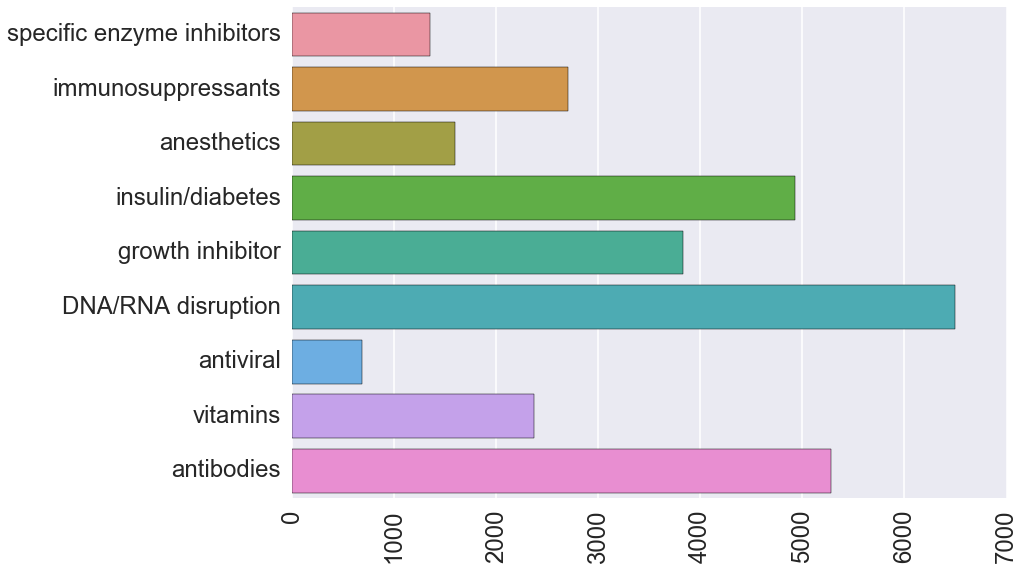

In [25]:
    sns.set_context('poster', font_scale=1.5)
    sns.barplot(list(drugs.values()), list(drugs.keys()))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)

In [4]:
places = pd.read_csv("authorities.txt", sep='|')
places.head()

,AUTHORITY_ID,NCT_ID,AUTHORITY
0,173,NCT00000335,United States: Federal Government
1,174,NCT00000336,United States: Federal Government
2,175,NCT00000337,United States: Federal Government
3,176,NCT00000338,United States: Federal Government
4,177,NCT00000339,United States: Federal Government


In [8]:
US = get_synonyms(places, 'AUTHORITY', 'United States')
len(US)

818

In [15]:
Germany = get_synonyms(places, 'AUTHORITY', 'Germany')
len(Germany)

589

In [14]:
Canada = get_synonyms(places, 'AUTHORITY', 'Canada')
len(Canada)

359

In [13]:
France = get_synonyms(places, 'AUTHORITY', 'France')
len(France)

604

In [11]:
UK = get_synonyms(places, 'AUTHORITY', 'United Kingdom')
len(UK)

275

In [12]:
China = get_synonyms(places, 'AUTHORITY', 'China')
len(China)

409

In [16]:
governments = {'United States': US, 'Germany': Germany, 'Canada': Canada, 'France': France,
              'United Kingdom': UK, 'China': China}

In [19]:
tokenize_and_count(places, 'AUTHORITY', governments)

{}